# Prob #1 Theory questions

## 1.1 PCA
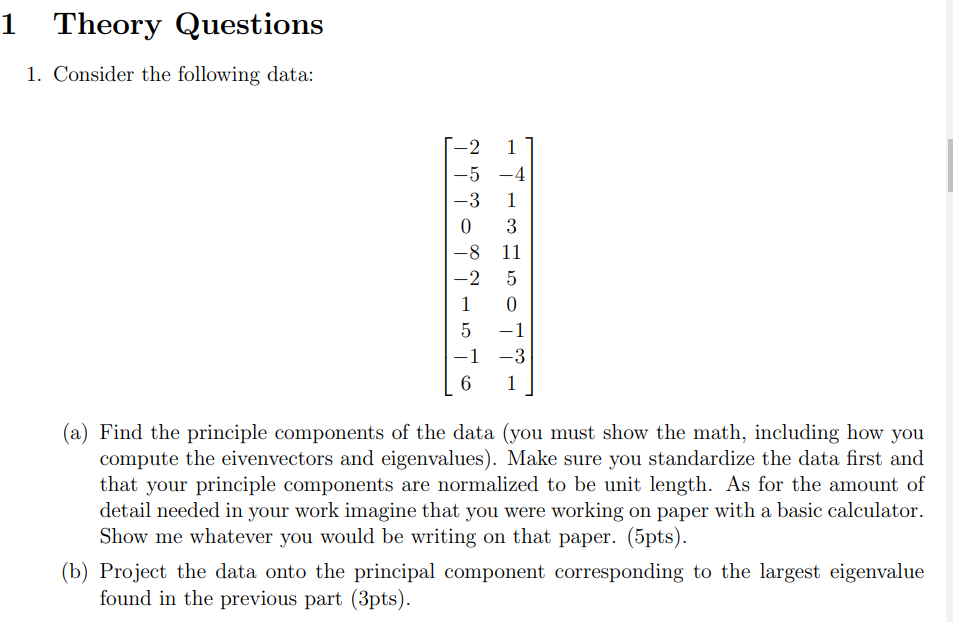


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
a=np.array([[-2,-5,-3,0,-8,-2,1,5,-1,6],[1,-4,1,3,11,5,0,-1,-3,1]]).T

### step 1: Standarlization

In [45]:
def st(a):
    a_st=(a-a.mean(axis=0))/a.std(axis=0,ddof=1)
    return a_st

In [46]:
a_st=st(a)

### step 2: Covariance matrix

In [47]:
cov_a=a_st.T@a_st/(len(a_st)-1)
print(cov_a)

[[ 1.         -0.40826218]
 [-0.40826218  1.        ]]


### step 3: Engi

In [48]:
val,vec=np.linalg.eig(cov_a)

In [49]:
print("Eigen values are:",val)
print("Eigen vectors are:",vec)

Eigen values are: [1.40826218 0.59173782]
Eigen vectors are: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


### step 4: Project

In [50]:
type(vec)

numpy.ndarray

In [51]:
pc=vec[:,0]

In [52]:
pc

array([ 0.70710678, -0.70710678])

In [168]:
prej_PCA_a=a_st@pc

In [169]:
prej_PCA_a

array([-0.11778069,  0.20774133, -0.2850161 , -0.11420117, -2.77564963,
       -0.77956329,  0.54937118,  1.38375847,  0.71123731,  1.22010258])

## 1.2. LDA
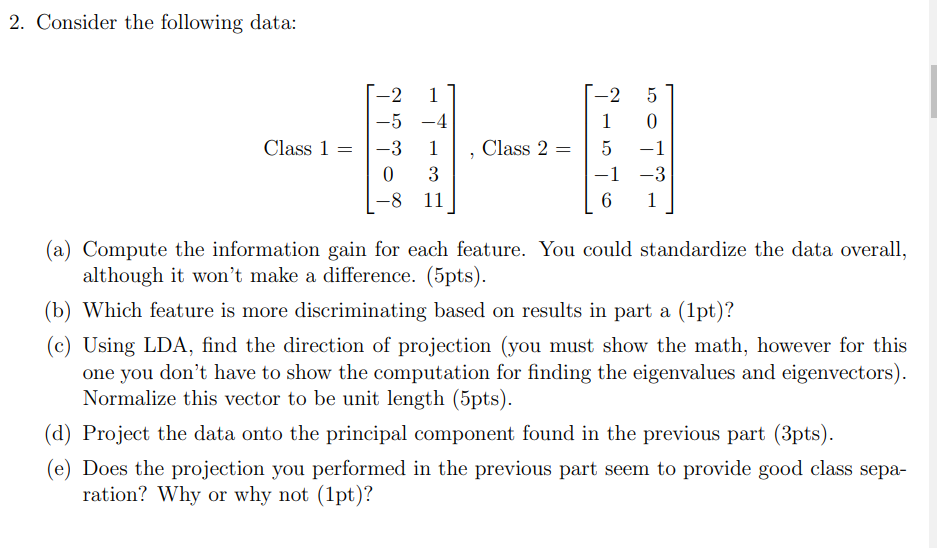

## step 1: St

In [34]:
c1=np.array([[-2,-5,-3,0,-8],[1,-4,1,3,11]]).T
c2=np.array([[-2,1,5,-1,6],[5,0,-1,-3,1]]).T

In [266]:
c1_st=st(c1)
c2_st=st(c2)
print(c1_st)

[[ 0.52466067 -0.25646016]
 [-0.45907809 -1.17238929]
 [ 0.19674775 -0.25646016]
 [ 1.1804865   0.1099115 ]
 [-1.44281684  1.57539811]]


In [267]:
print(c2_st)

[[-1.06630571  1.55065968]
 [-0.22448541 -0.13483997]
 [ 0.89794165 -0.4719399 ]
 [-0.78569895 -1.14613977]
 [ 1.17854842  0.20225996]]


 ### b) the first feature has <font color='red'>**more IG**</font>

#### Information Gain:
To compute information gain of features, 
- the <font color='red'>mean value </font> is used as cut off value 

In [268]:
def condi_entropy(c1,c2,f, mean=0):
    c1_cat=(c1>=mean).astype(int)
    c2_cat=(c2>=mean).astype(int)
    
    
    
    #------------f_value>0, #_c1 and #_c2 -----------
    #f_val1=c1_cat[:,f].sum()/c1_cat.shape[0]*math.log2(c1_cat[:,f].sum()/(c1_cat.shape[0])+c2_cat[:,f].sum()/c2_cat.shape[0]*math.log2(c2_cat[:,f].sum()/c2_cat.shape[0])
    p_value1=(c1_cat[:,f].sum()+c2_cat[:,f].sum())/(c1_cat.shape[0]+c2_cat.shape[0])
    entropy_value1=c1_cat[:,f].sum()/(c1_cat[:,f].sum()+c2_cat[:,f].sum())*math.log(c1_cat[:,f].sum()/(c1_cat[:,f].sum()+c2_cat[:,f].sum()),2)+c2_cat[:,f].sum()/(c1_cat[:,f].sum()+c2_cat[:,f].sum())
    f_val1= p_value1*entropy_value1                                                
    

    #------------f_vlaue<0, #_c1 and #_c2 -----------
    #f_val2=(1-c1_cat[:,f].sum()/c1_cat.shape[0])*math.log2((1-c1_cat[:,f].sum()/c1_cat.shape[0]))+(1-c2_cat[:,f].sum()/c2_cat.shape[0])*math.log2((1-c2_cat[:,f].sum()/c2_cat.shape[0]))
    p_value2=1-(c1_cat[:,f].sum()+c2_cat[:,f].sum())/(c1_cat.shape[0]+c2_cat.shape[0])
    entropy_value2=(c1_cat[:,f]<1).sum()/((c1_cat[:,f]<1).sum()+(c2_cat[:,f]<1).sum())*math.log((c1_cat[:,f]<1).sum()/((c1_cat[:,f]<1).sum()+(c2_cat[:,f]<1).sum()),2)+(c2_cat[:,f]<1).sum()/((c1_cat[:,f]<1).sum()+(c2_cat[:,f]<1).sum())*math.log((c2_cat[:,f]<1).sum()/((c1_cat[:,f]<1).sum()+(c2_cat[:,f]<1).sum()),2)
    f_val2= p_value2*entropy_value2
    
  
    
    return -(f_val1+f_val2)

In [269]:
ori_entropy=-0.5*math.log(0.5,2)*2

In [270]:
ori_entropy

1.0

In [271]:
IG_c1=ori_entropy-condi_entropy(c1_st,c2_st,f=0,mean=0)
IG_c1

0.49343502452280386

In [272]:
IG_c2=ori_entropy-condi_entropy(c1_st,c2_st,f=1,mean=0)
IG_c2

0.4

### c) Find LDA
The first feature has <font color='red'>**more weights**</font> corresponding to the IG analysis above

#### step 1 : find scatter matrix of c1 and c2

In [129]:
c1_sigma=((c1.shape[0]-1)*c1.std(axis=0,ddof=1)[:,np.newaxis])@(c1.std(axis=0,ddof=1)[:,np.newaxis]).T
c2_sigma=((c2.shape[0]-1)*c2.std(axis=0,ddof=1)[:,np.newaxis])@(c2.std(axis=0,ddof=1)[:,np.newaxis]).T

#### step 2: find between class scatter matrix 

In [137]:
Sb=(c1.mean(axis=0)-c2.mean(axis=0))[:,np.newaxis]@((c1.mean(axis=0)-c2.mean(axis=0))[:,np.newaxis]).T

In [204]:
Sb

array([[ 29.16, -10.8 ],
       [-10.8 ,   4.  ]])

#### step 3: find within class scatter matrix 

In [139]:
Sw=c1_sigma+c2_sigma

In [205]:
Sw

array([[ 88.        , 108.87673027],
       [108.87673027, 154.4       ]])

#### step 3: find prejection vector

In [161]:
val,vec=np.linalg.eig(np.linalg.inv(Sw)@Sb)

In [162]:
print("Eigen values:", val)
print("Eigen vectors:",vec)

Eigen values: [4.15799299e+00 2.22044605e-16]
Eigen vectors: [[ 0.80902976  0.34731436]
 [-0.58776768  0.93774876]]


The **non_zero eigen-value** corresponding eigen_vector is direction of projection

In [207]:
LDA=vec[:,0]/np.linalg.norm(vec[:,0])

In [208]:
LDA

array([ 0.80902976, -0.58776768])

#### step 4: project and compare with PCA

In [209]:
proj_LDA_c1=c1@LDA
proj_LDA_c2=c2@LDA

Text(0.5, 1.0, 'LDA')

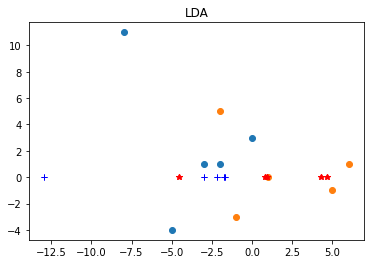

In [220]:
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])
plt.plot(proj_LDA_c1,np.zeros_like(c1),linestyle="None",marker="+",c="b")
plt.plot(proj_LDA_c2,np.zeros_like(c2),linestyle="None",marker="*",c="r")
plt.title("LDA")

Text(0.5, 1.0, 'PCA')

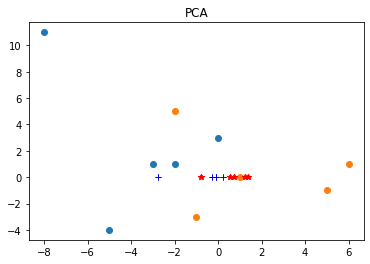

In [221]:
plt.scatter(a[:5,0],a[:5,1])
plt.scatter(a[5:,0],a[5:,1])
plt.plot(prej_PCA_a[:5],np.zeros_like(a[:5]),linestyle="None",marker="+",c="b")
plt.plot(prej_PCA_a[5:],np.zeros_like(a[5:]),linestyle="None",marker="*",c="r")
plt.title("PCA")

# Prob #2 Dimensionality reduction with PCA

In [104]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [105]:
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [106]:
image_shape=people.images[0].shape
image_shape

(87, 65)

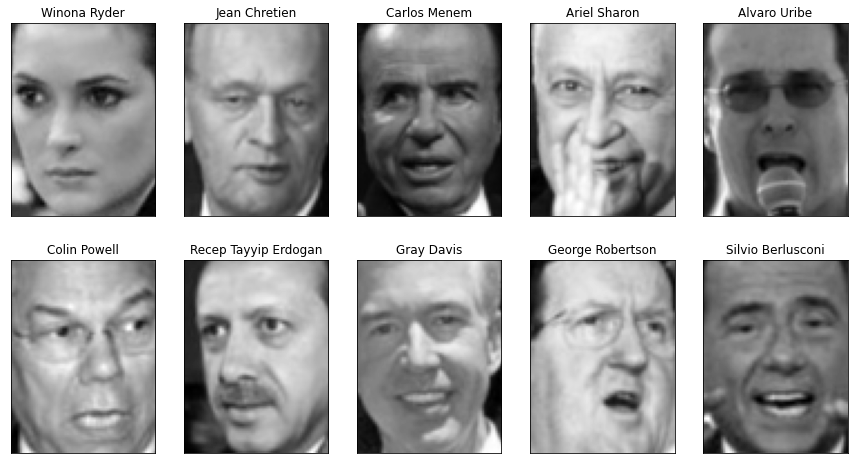

In [107]:
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={"xticks":(),"yticks":()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image,cmap=cm.gray)
    ax.set_title(people.target_names[target])
    

In [108]:
print("people images shape:{}".format(people.images.shape))
print("Number of classes:{}".format(len(people.target_names)))

people images shape:(3023, 87, 65)
Number of classes:62


### 1. Skewed dataset
This dataset is skewed toward George W. Bush and Colin Powell as you can verify here.

In [109]:
## count how often each target appears
counts=np.bincount(people.target)

In [110]:
counts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

In [111]:
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:13}".format(name,count),end="")
    if (i+1)%3==0:
        print()

Alejandro Toledo                     39Alvaro Uribe                         35Amelie Mauresmo                      21
Andre Agassi                         36Angelina Jolie                       20Ariel Sharon                         77
Arnold Schwarzenegger                42Atal Bihari Vajpayee                 24Bill Clinton                         29
Carlos Menem                         21Colin Powell                        236David Beckham                        31
Donald Rumsfeld                     121George Robertson                     22George W Bush                       530
Gerhard Schroeder                   109Gloria Macapagal Arroyo              44Gray Davis                           26
Guillermo Coria                      30Hamid Karzai                         22Hans Blix                            39
Hugo Chavez                          71Igor Ivanov                          20Jack Straw                           28
Jacques Chirac                       52Jean Chretien    

#### Resample the dataset

To make the data **less skewed**, we will only take up to 50 images of each person (otherwise, the
feature extraction would be overwhelmed by the likelihood of George W. Bush):


In [95]:
people.target.shape

(3023,)

In [169]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

In [170]:
X_people=people.data[mask]
y_people=people.target[mask]

### 2. Rescale the data to 0 to 1

In [98]:
# scale the gray scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability

In [16]:
X_people=X_people/255

### 3. KNN in sklearn
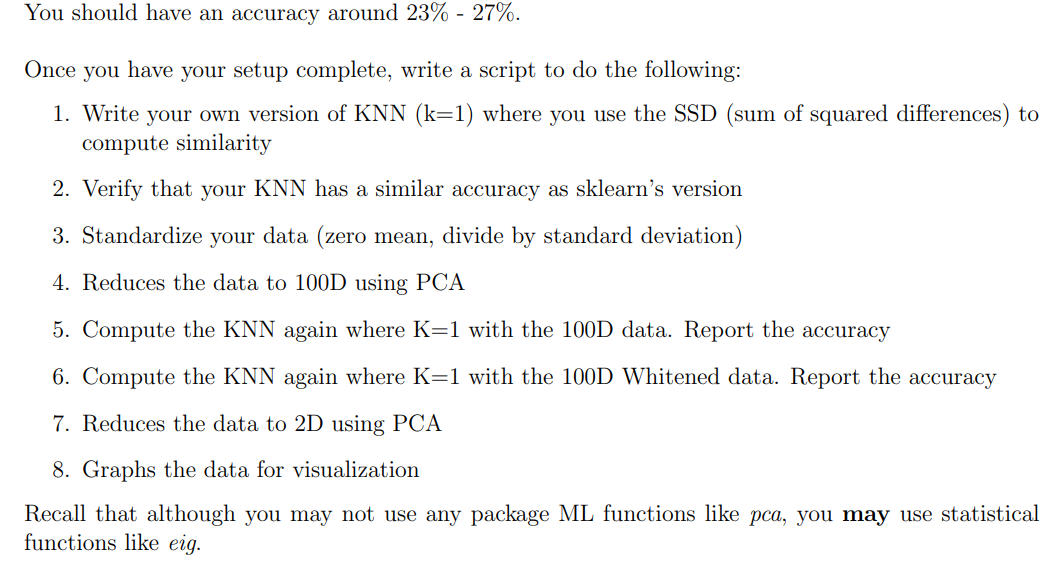

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)

In [101]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-NN: {:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-NN: 0.23


### 4. KNN from scatch

In [23]:
import pandas as pd

In [78]:
def KNN(train,label,data,n_neighbors=1):
    train=pd.DataFrame(train)
    distance=train.apply(lambda x:np.linalg.norm(x-data),axis=1)
    dist_label_array=np.vstack((distance,label))
    dist_label=pd.DataFrame(dist_label_array.T)
    dist_label.columns=["dist","target"]
    sort_dist=dist_label.sort_values("dist")
    label=sort_dist.head(n_neighbors)["target"].mode()
    return label.

In [79]:
X_train.shape

(1547, 5655)

In [112]:
y_test.shape

(516,)

In [113]:

y_pred=[]
for row in X_test:
    y_pred.append(KNN(X_train,y_train,row))


KeyboardInterrupt: 

### PCA

In [135]:
X_train_stand=(X_train-X_train.mean(axis=0))/X_train.std(axis=0,ddof=1)
X_test_stand=(X_test-X_train.mean(axis=0))/X_train.std(axis=0,ddof=1)

In [117]:
val,vec=np.linalg.eig(X_train_stand.T@X_train_stand)

In [118]:
val

array([ 2.3204940e+06,  9.5925819e+05,  6.7563562e+05, ...,
       -2.2658597e-04, -4.4455763e-04,  3.9361627e-04], dtype=float32)

In [119]:
vec.shape

(5655, 5655)

#### PCA to 100 D

In [139]:
pca=X_train_stand@vec[:,:100]
X_test_pca=X_test_stand@vec[:,:100]

In [145]:
knn_pca=KNeighborsClassifier(n_neighbors=1)
knn_pca.fit(pca,y_train)
print("Test set score of 1-NN: {:.2f}".format(knn_pca.score(X_test_pca,y_test)))

Test set score of 1-NN: 0.25


#### PCA to 100 D whitening

In [147]:
pca_white=X_train_stand@vec[:,:100]@np.diag(1/np.sqrt(np.abs(val[:100])))
X_test_pca_white=X_test_stand@vec[:,:100]@np.diag(1/np.sqrt(np.abs(val[:100])))

In [148]:
knn_pca_white=KNeighborsClassifier(n_neighbors=1)
knn_pca_white.fit(pca_white,y_train)
print("Test set score of 1-NN: {:.2f}".format(knn_pca_white.score(X_test_pca_white,y_test)))

Test set score of 1-NN: 0.33


#### PCA to 2D

In [156]:
pca_2=X_train_stand@vec[:,:2]
X_test_pca_2=X_test_stand@vec[:,:2]

In [157]:
knn_pca2=KNeighborsClassifier(n_neighbors=1)
knn_pca2.fit(pca_2,y_train)
print("Test set score of 1-NN: {:.2f}".format(knn_pca2.score(X_test_pca_2,y_test)))

Test set score of 1-NN: 0.03


## Prob 3 Eigen face

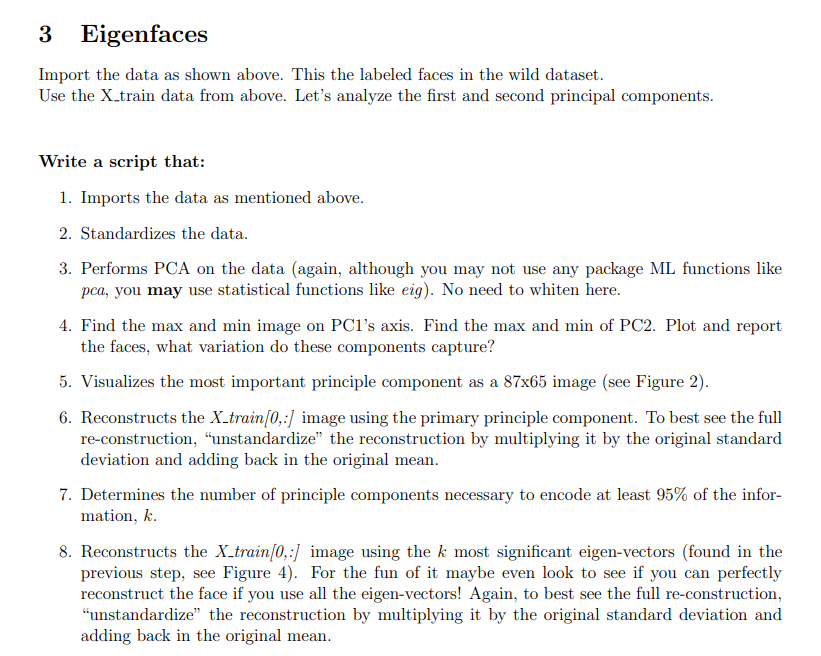

The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images.

A set of eigenfaces can be generated by performing a mathematical process called principal component analysis (PCA) on a large set of images depicting different human faces. Informally, eigenfaces can be considered a set of "standardized face ingredients", derived from statistical analysis of many pictures of faces. 

Any human face can be considered to be a combination of these standard faces. For example, one's face might be composed of the average face plus 10% from eigenface 1, 55% from eigenface 2, and even −3% from eigenface 3. Remarkably, it does not take many eigenfaces combined together to achieve a fair approximation of most faces. 

In [159]:
def plot_face(idx):
    plt.imshow(X_train[idx,:].reshape(87,65),cmap = cm.gray)

In [158]:
pca_2.shape

(1547, 2)

### 1. 1 PCA1 dominated face

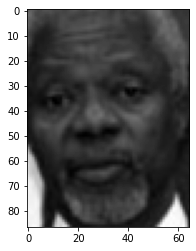

In [162]:
max1=pca_2[:,0].argmax()
plot_face(max1)

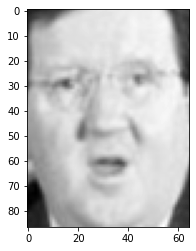

In [165]:
min1=pca_2[:,0].argmin()
plot_face(min1)

### 1.2 PCA 2 dominated face

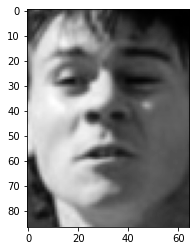

In [166]:
max2=pca_2[:,1].argmax()
plot_face(max2)

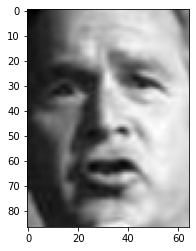

In [167]:
min2=pca_2[:,1].argmin()
plot_face(min2)

### 2. PCA1 component face

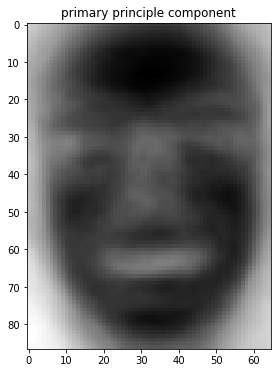

In [153]:
plt.figure(figsize = (6,6))
plt.imshow((vec[:,0]).reshape(87,65),cmap = cm.gray)
plt.title('primary principle component')
plt.savefig('HW3Q3-5.jpg')

### 3. Reconstruct face from PCA1

In [197]:
face1=(pca_2[0,0])*(vec[:,0])
std=X_train.std(axis=0,ddof=1)
mean=X_train.mean(axis=0)

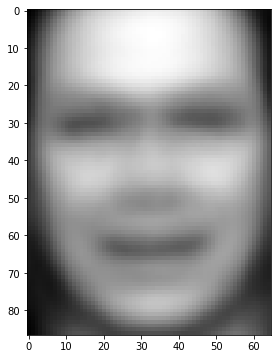

In [198]:
plt.figure(figsize = (6,6))
plt.imshow((face1*std+mean).reshape(87,65),cmap = cm.gray)

### Reconstruct face1 from 95% pca

In [203]:
def find_pca95(val):
    sum_var=val.sum()
    var95=0
    i=0
    while var95<0.95:
        var95+=val[i]/sum_var
        i+=1
    return i

In [204]:
pca95=find_pca95(val)

In [209]:
val

array([ 2.3204940e+06,  9.5925819e+05,  6.7563562e+05, ...,
       -2.2658597e-04, -4.4455763e-04,  3.9361627e-04], dtype=float32)

In [210]:
pca_decom=X_train_stand@vec

In [211]:
face1_pac95=(pca_decom[0,:pca95])@(vec[:,:pca95]).T

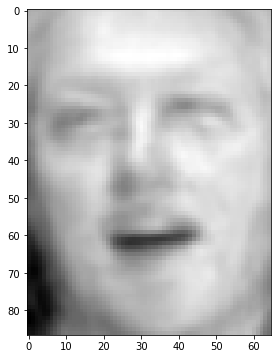

In [212]:
plt.figure(figsize = (6,6))
plt.imshow((face1_pac95*std+mean).reshape(87,65),cmap = cm.gray)

### Original face

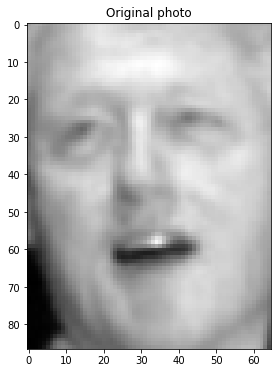

In [200]:
plt.figure(figsize = (6,6))
plt.imshow((X_train[0,:]).reshape(87,65),cmap = cm.gray)
plt.title('Original photo')
plt.savefig('HW3Q3-6-0.jpg')